Mengmeng Wu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns            

### Visualization 1

In [3]:
df = pd.read_csv("/Users/wumengmeng/Desktop/2025_winter/BotBuster-Universe/BotBuster_UI/temp/20250214_012048/user_bot_degree.csv",index_col=0)

In [4]:
df.head()

,username,in_degree,out_degree,total_degree,betweenness_centrality,is_bot
0,mm7m0ccve,8,3,11,0.000001,False
1,oxub5tnr,46,1,47,0.000000,False
2,1kbebmiu,14,1,15,0.000000,False
3,9ourbvb,39,2,41,0.000186,False
4,u67rd0zep,13,1,14,0.000000,False


In [60]:
df["total_degree"].value_counts()

total_degree
2      3510
1       512
3       151
4        61
5        32
6        17
7         7
8         6
9         6
10        4
11        4
14        4
16        2
17        2
15        2
13        2
12        2
26        1
47        1
18        1
41        1
19        1
247       1
35        1
20        1
21        1
Name: count, dtype: int64

I want to check the distribution of degree centrality. because it is a continuous variable, so i use histogram

Text(0.5, 9.444444444444438, 'Degree Centrality Value')

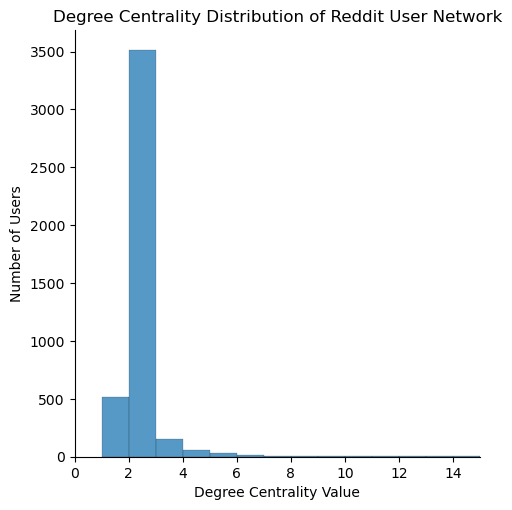

In [7]:
sns.displot(data = df, x = 'total_degree', kind = 'hist', binwidth = 1) 

plt.xlim(0, 15)
plt.title("Degree Centrality Distribution of Reddit User Network")
plt.ylabel('Number of Users', size = 10)
plt.xlabel('Degree Centrality Value', size = 10)


The figure shows that the distribution of the degree is highly skewed to the right, with most degrees concentrated at 1, 2, and 3. This suggests that the majority of users may have only commented on a post once or responded to another user's comment, lacking further interactive exchanges.

### Visualization 2

Next, I want to compare the degree difference bewteen human and bot users.

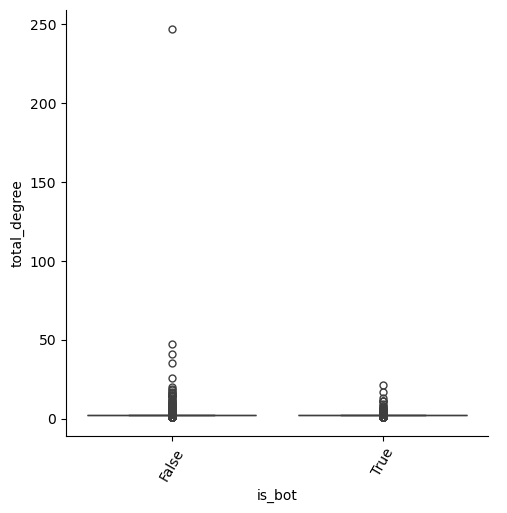

In [36]:
sns.catplot(data = df, x = 'is_bot', y = 'total_degree', kind = 'box') 
plt.xticks(rotation = 60);

The intial try suggests there are significant outliers in human users. This indicates that there is big influencers in human users. Also, considering the data distribution is highly rightly skewed, let's filter out the outlier and do better visualize.

In [37]:
df_cleaned = df[df['total_degree'] <= 50]
df_cleaned['total_degree_log'] = np.log(df_cleaned['total_degree'])

/var/folders/3y/pp5rq62s315dq6zz6hm6ywg40000gn/T/ipykernel_62628/3067362200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['total_degree_log'] = np.log(df_cleaned['total_degree'])


In [38]:
df_cleaned

,username,in_degree,out_degree,total_degree,betweenness_centrality,is_bot,total_degree_log
0,mm7m0ccve,8,3,11,0.000001,False,2.397895
1,oxub5tnr,46,1,47,0.000000,False,3.850148
2,1kbebmiu,14,1,15,0.000000,False,2.708050
3,9ourbvb,39,2,41,0.000186,False,3.713572
4,u67rd0zep,13,1,14,0.000000,False,2.639057
...,...,...,...,...,...,...,...
4328,vnitgo7h,1,1,2,0.000000,False,0.693147
4329,19kdigejvw,1,1,2,0.000000,False,0.693147
4330,7ta851b9n,0,1,1,0.000000,False,0.000000
4331,riff57l7u,1,1,2,0.000000,False,0.693147


([<matplotlib.axis.XTick at 0x30d846900>,
 [Text(0, 0, 'Human'), Text(1, 0, 'Bot')])

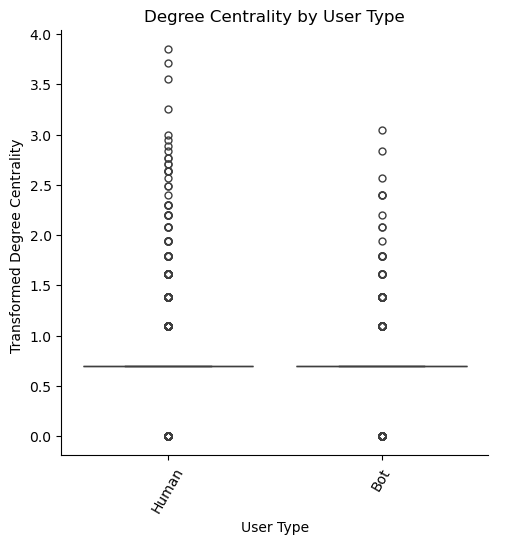

In [46]:
sns.catplot(data = df_cleaned, x = 'is_bot', y = 'total_degree_log', kind = 'box') 
plt.xticks(rotation = 60)
plt.title("Degree Centrality by User Type")
plt.ylabel('Transformed Degree Centrality ', size = 10)
plt.xlabel('User Type', size = 10)
plt.xticks(ticks=[0, 1], labels=['Human', 'Bot']) 

Interestingly, we can observe that the values 0.25, 0.72, and the mean line in the box plot align along the same line, corresponding to an original total degree of 2. We see the same pattern for both bot and human users. This suggests that, for both bot and human users, most interactions involve commenting only once on the original post. However, the key difference lies in human users, where more active users, such as influencers, tend to drive further interactions by posting comments or creating content that attracts a large number of replies.

I also want to do another figure comparing in and out degree by user type. To this end, I filter out the users with low-frequency of interaction and only explore the pattern in actively interacting users.

In [52]:
df_cleaned_2 = df[(df['in_degree'] >= 1) & (df['in_degree'] <= 50) & 
                (df['out_degree'] >= 1) & (df['out_degree'] <= 50)]

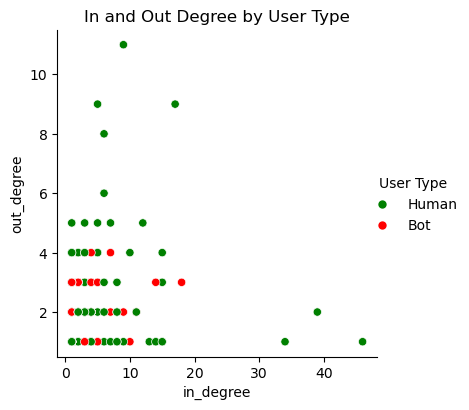

In [59]:
g = sns.relplot(
    data=df_cleaned_2, 
    x='in_degree', 
    y='out_degree', 
    kind='scatter',
    height=4,
    aspect=1,
    hue='is_bot',
    palette={0: 'green', 1: 'red'}
)

# Add title to the plot
plt.title("In and Out Degree by User Type")


# Fix the legend with correct colors
handles, labels = plt.gca().get_legend_handles_labels()
legend = g._legend
legend.set_title("User Type")
legend.texts[0].set_text("Human")
legend.texts[1].set_text("Bot")

# Display the plot
plt.show()

The result has two key implications. Firstly, in-degree is not related to out-degree. A user who actively comments on other posts does not necessarily engage in reciprocal interactions; their own posts may not attract responses, and vice versa. Secondly, both in-degree and out-degree follow similar patterns to overall degree centrality. In other words, users who frequently comment on others' posts or attract others' comments are mostly human users, not bots.